ML Engineer Task

Outcome:

1. Jupyter notebook with Data Cleaning & Processing 
2. ML Model to **Predict Accident Severity** (Split Data into train-75%, validate-15% & test-10%)
3. Recommendations on the research

Step1 - Imports

The dataset is reduced to 5k datapoints for the ease of computation and named as mltask_sampled.csv , the code for the same is named as Computation.ipynb

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mltask_sampled.csv')

Step 2: Check initial data

In [ ]:

print("Initial Data Information:")
df.info()

# Step 2: Check missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())



Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   object 
 1   Source                 5000 non-null   object 
 2   Severity               5000 non-null   int64  
 3   Start_Time             5000 non-null   object 
 4   End_Time               5000 non-null   object 
 5   Start_Lat              5000 non-null   float64
 6   Start_Lng              5000 non-null   float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           5000 non-null   float64
 10  Description            5000 non-null   object 
 11  Street                 5000 non-null   object 
 12  City                   5000 non-null   object 
 13  County                 5000 non-null   object 
 14  State                  5000 no

Step 3: Handling Missing Values and data cleaning

In [ ]:


# Fill missing latitude and longitude values with the mean (numerical data)
df['End_Lat'] = df['End_Lat'].fillna(df['End_Lat'].mean())
df['End_Lng'] = df['End_Lng'].fillna(df['End_Lng'].mean())

# Fill 'Number' column with mode if it exists
if 'Number' in df.columns:
    df['Number'] = df['Number'].fillna(df['Number'].mode()[0])

# Fill categorical columns (e.g., 'Street', 'City', etc.) with mode
df['Street'] = df['Street'].fillna(df['Street'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])
df['Zipcode'] = df['Zipcode'].fillna(df['Zipcode'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Timezone'] = df['Timezone'].fillna(df['Timezone'].mode()[0])
df['Airport_Code'] = df['Airport_Code'].fillna(df['Airport_Code'].mode()[0])

# Weather-related columns (numeric data filled with mean, categorical with mode)
df['Weather_Timestamp'] = df['Weather_Timestamp'].fillna(df['Weather_Timestamp'].mode()[0])
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())

# Handle the twilight and period of the day columns
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0])
df['Civil_Twilight'] = df['Civil_Twilight'].fillna(df['Civil_Twilight'].mode()[0])
df['Nautical_Twilight'] = df['Nautical_Twilight'].fillna(df['Nautical_Twilight'].mode()[0])
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].fillna(df['Astronomical_Twilight'].mode()[0])

# Step 4: Handling DateTime columns (convert to datetime if needed)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')



# Extract features like year, month, day, hour, minute, and second
df['Start_Year'] = df['Start_Time'].dt.year
df['Start_Month'] = df['Start_Time'].dt.month
df['Start_Day'] = df['Start_Time'].dt.day
df['Start_Hour'] = df['Start_Time'].dt.hour
df['Start_Minute'] = df['Start_Time'].dt.minute
df['Start_Second'] = df['Start_Time'].dt.second

df['End_Year'] = df['End_Time'].dt.year
df['End_Month'] = df['End_Time'].dt.month
df['End_Day'] = df['End_Time'].dt.day
df['End_Hour'] = df['End_Time'].dt.hour
df['End_Minute'] = df['End_Time'].dt.minute
df['End_Second'] = df['End_Time'].dt.second

# Drop the original datetime columns if no longer needed
df = df.drop(['Start_Time', 'End_Time'], axis=1)


# Step 5: Drop columns that are not needed for prediction (if applicable)
df = df.drop(['ID', 'Source', 'Description'], axis=1)

# Step 6: Check for duplicates and remove them
df = df.drop_duplicates()

# Step 7: Handle outliers - Example: cap extreme values for wind speed, temperature, and precipitation
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].clip(upper=df['Wind_Speed(mph)'].quantile(0.95))
df['Temperature(F)'] = df['Temperature(F)'].clip(lower=df['Temperature(F)'].quantile(0.05),
                                                upper=df['Temperature(F)'].quantile(0.95))
df['Precipitation(in)'] = df['Precipitation(in)'].clip(upper=df['Precipitation(in)'].quantile(0.95))

# Step 8: Check for any remaining missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

# Step 9: Convert categorical variables to category type (if applicable) for memory efficiency
categorical_columns = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
                       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

# Step 10: Encode the target variable 'Severity' as numeric for ML models
df['Severity'] = df['Severity'].astype('category').cat.codes



Missing values after cleaning:
Severity                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  5000
End_Lng                  5000
Distance(mi)                0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction             19
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition          36
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station  

Step 4: Final Check on the processed dataset

In [ ]:

print("Final Dataset Information:")
print(df.info())

# Step 12: Save the cleaned dataset to a new CSV file (optional)
df.to_csv('mltask_sampled_cleaned.csv', index=False)


Final Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Severity               5000 non-null   int8    
 1   Start_Lat              5000 non-null   float64 
 2   Start_Lng              5000 non-null   float64 
 3   End_Lat                0 non-null      float64 
 4   End_Lng                0 non-null      float64 
 5   Distance(mi)           5000 non-null   float64 
 6   Street                 5000 non-null   category
 7   City                   5000 non-null   category
 8   County                 5000 non-null   category
 9   State                  5000 non-null   category
 10  Zipcode                5000 non-null   category
 11  Country                5000 non-null   category
 12  Timezone               5000 non-null   category
 13  Airport_Code           5000 non-null   category
 14  Weather_Times

Step 5: Split the dataset into features (X) and target (y)

In [24]:

X = df.drop('Severity', axis=1)  # Drop the target column
y = df['Severity']  # Target column


Step 6: Train-Validate-Test Split

In [ ]:

# First, split into train+validate (90%) and test (10%)
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Then, split train+validate into train (75%) and validate (15%)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=0.1667, random_state=42)  # 0.1667 ~ 15% of the original data

# Check the sizes of the splits
print("Train size:", X_train.shape, y_train.shape)
print("Validation size:", X_validate.shape, y_validate.shape)
print("Test size:", X_test.shape, y_test.shape)


Train size: (3749, 52) (3749,)
Validation size: (751, 52) (751,)
Test size: (500, 52) (500,)


Step 7: Handle categorical columns using One-Hot Encoding

In [ ]:

categorical_columns = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 
                       'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 
                       'Weather_Timestamp', 'Sunrise_Sunset', 'Civil_Twilight', 
                       'Nautical_Twilight', 'Astronomical_Twilight']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Initialize the Random Forest Classifier and fit it to the training data
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       565
           2       0.88      0.85      0.87       434
           3       0.00      0.00      0.00         1

    accuracy                           0.89      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.88      0.89      0.88      1000



C:\Users\Mithun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mithun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mithun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Step 8: Visualization through bar chart

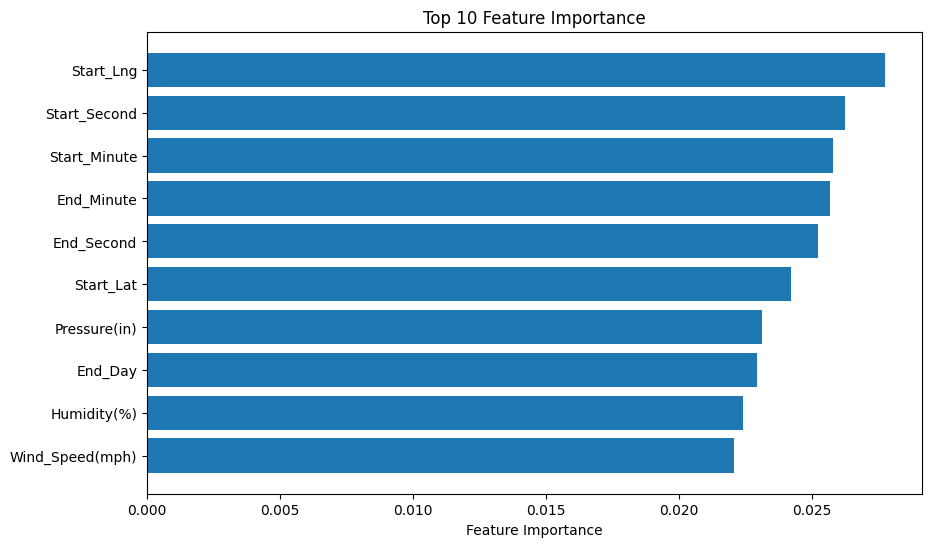

In [32]:
# Sample a smaller subset for quick testing
X_small = X.sample(n=1000, random_state=42)
y_small = y[:1000]

# Train Random Forest with fewer trees and parallel jobs
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_small, y_small)

# Get feature importances and sort them
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot the top 10 most important features
top_n = 10
sorted_idx = sorted_idx[-top_n:]
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[sorted_idx], align="center")
plt.yticks(range(top_n), [X.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importance")
plt.show()


Step 9: Confusion Matrix Analysis

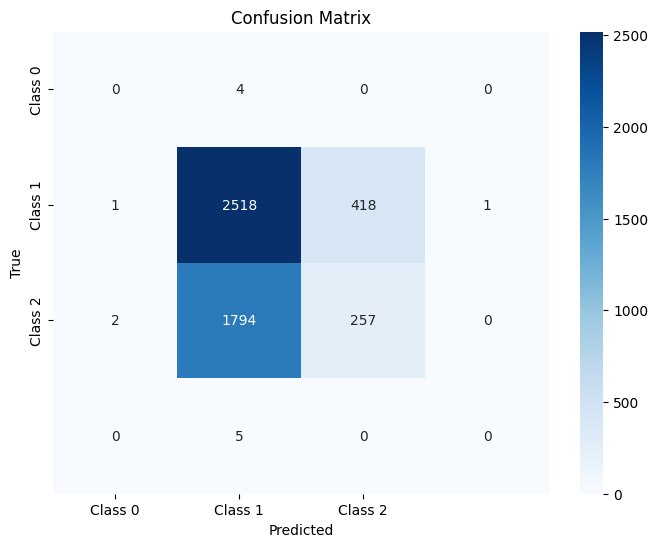

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix
y_pred = rf_model.predict(X)
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Step 10: Analysis through Learning Curve

C:\Users\Mithun\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


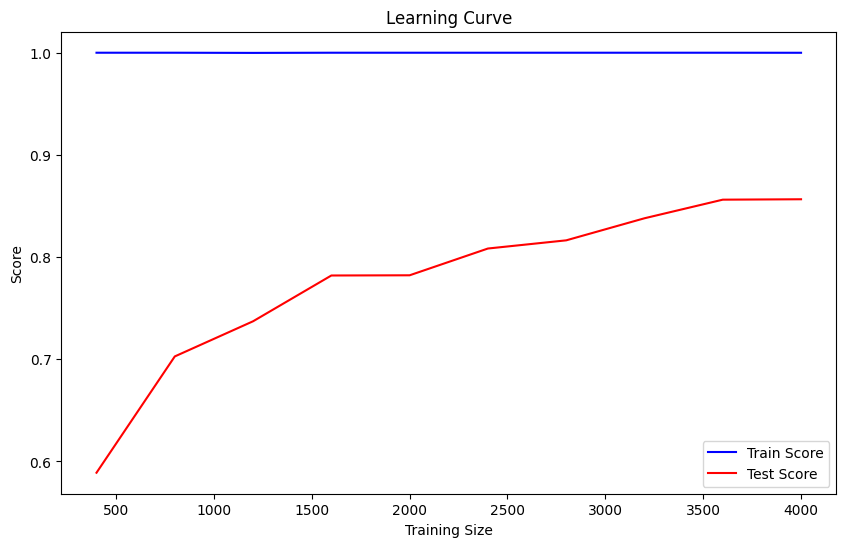

In [34]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color='red')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


Step 11: Recommendations

In [35]:
print("1. Ensure proper data cleaning by handling missing values and outliers.")
print("2. Add more relevant features such as traffic volume, accident type, etc.")
print("3. Fine-tune the model using hyperparameter optimization (e.g., GridSearchCV).")
print("4. Consider other models (e.g., Gradient Boosting, XGBoost) for comparison.")
print("5. Use cross-validation to get a more accurate measure of model performance.")

1. Ensure proper data cleaning by handling missing values and outliers.
2. Add more relevant features such as traffic volume, accident type, etc.
3. Fine-tune the model using hyperparameter optimization (e.g., GridSearchCV).
4. Consider other models (e.g., Gradient Boosting, XGBoost) for comparison.
5. Use cross-validation to get a more accurate measure of model performance.
